In [1]:
# from datasets import load_dataset

# ds = load_dataset("ylecun/mnist")

In [101]:
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

In [3]:
transform = transforms.Compose([
    transforms.ToTensor()
])

In [4]:
train_data = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_data = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_data, batch_size=100, shuffle=True, num_workers=1)
test_loader = DataLoader(test_data, batch_size=100, shuffle=True, num_workers=1)

In [5]:
train_data
# train_data.data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [6]:
test_data
# test_data.data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [7]:
np.unique(train_data.targets.numpy())

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [33]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.softmax(x)

In [34]:
device = torch.device('cpu')

In [35]:
model = CNN().to(device)

In [36]:
model

CNN(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)

In [103]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 20 == 0:
            percentage = 100. * batch_idx / len(train_loader)
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)} / {len(train_loader.dataset)} ({percentage:.0f}%)]\t{loss.item():.6f}')

def test():
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    print(f'\nTest Set Average Loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({accuracy:.0f}%)\n')
    return (accuracy, test_loss)

In [56]:
accuracy = []
loss = []

for epoch in range(1, 31):
    train(epoch)
    test_accuracy, test_loss = test()
    
    accuracy = np.append(accuracy, test_accuracy)
    loss = np.append(loss, test_loss)

/var/folders/fz/m3b664vj5hq4kdmwr645k9_h0000gn/T/ipykernel_48215/3103588123.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [0 / 60000 (0%)]	1.474642
Train Epoch: 1 [2000 / 60000 (3%)]	1.502006
Train Epoch: 1 [4000 / 60000 (7%)]	1.506600
Train Epoch: 1 [6000 / 60000 (10%)]	1.513399
Train Epoch: 1 [8000 / 60000 (13%)]	1.518602
Train Epoch: 1 [10000 / 60000 (17%)]	1.505501
Train Epoch: 1 [12000 / 60000 (20%)]	1.508785
Train Epoch: 1 [14000 / 60000 (23%)]	1.587547
Train Epoch: 1 [16000 / 60000 (27%)]	1.540357
Train Epoch: 1 [18000 / 60000 (30%)]	1.552695
Train Epoch: 1 [20000 / 60000 (33%)]	1.542478
Train Epoch: 1 [22000 / 60000 (37%)]	1.511925
Train Epoch: 1 [24000 / 60000 (40%)]	1.498972
Train Epoch: 1 [26000 / 60000 (43%)]	1.545068
Train Epoch: 1 [28000 / 60000 (47%)]	1.542591
Train Epoch: 1 [30000 / 60000 (50%)]	1.524418
Train Epoch: 1 [32000 / 60000 (53%)]	1.525504
Train Epoch: 1 [34000 / 60000 (57%)]	1.521424
Train Epoch: 1 [36000 / 60000 (60%)]	1.503158
Train Epoch: 1 [38000 / 60000 (63%)]	1.473423
Train Epoch: 1 [40000 / 60000 (67%)]	1.508349
Train Epoch: 1 [42000 / 60000 (70%)]	1.526007

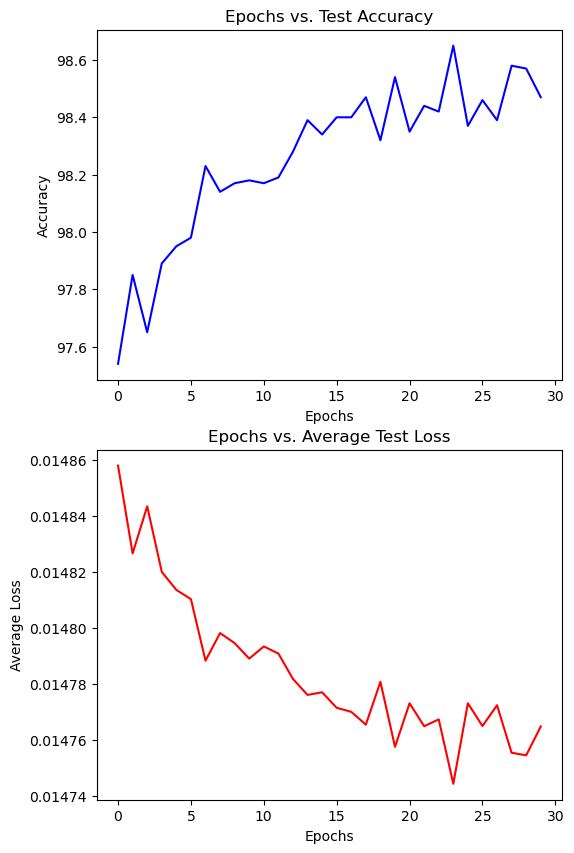

In [105]:
plt.figure(figsize=(6,10))
plt.subplot(2, 1, 1)
plt.plot(np.arange(0, len(accuracy), 1), accuracy, 'b-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Epochs vs. Test Accuracy')

plt.subplot(2, 1, 2)
plt.plot(np.arange(0, len(loss), 1), loss, 'r-')
plt.xlabel('Epochs')
plt.ylabel('Average Loss')
plt.title('Epochs vs. Average Test Loss')

plt.savefig('accuracy-and-loss-graphs.png')
plt.show()

/var/folders/fz/m3b664vj5hq4kdmwr645k9_h0000gn/T/ipykernel_48215/3103588123.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


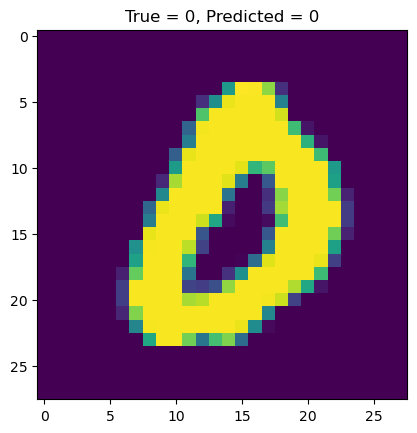

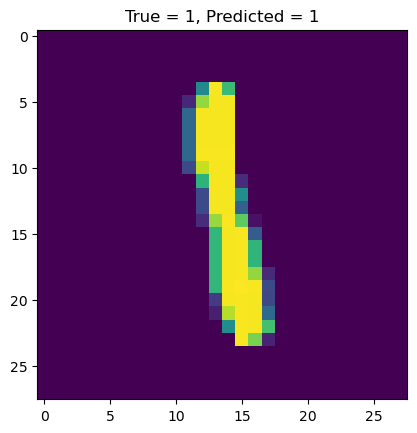

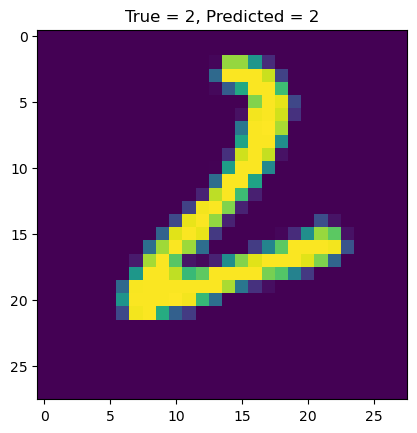

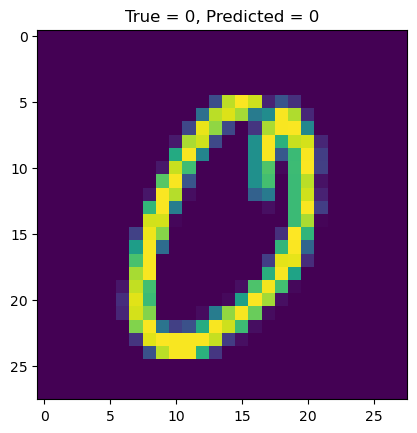

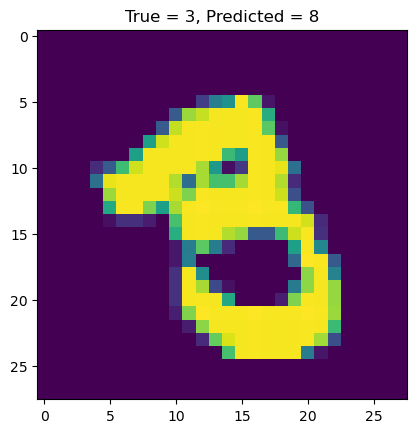

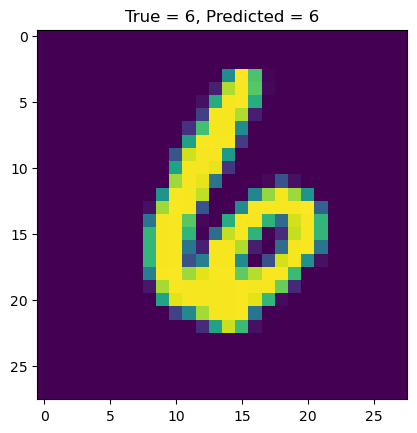

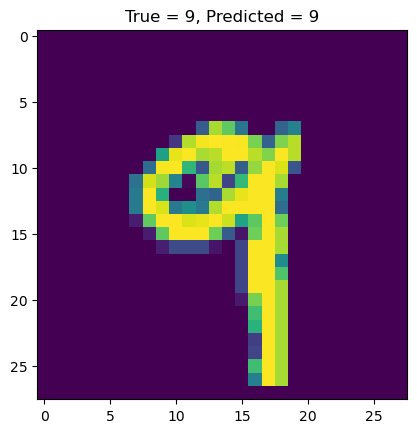

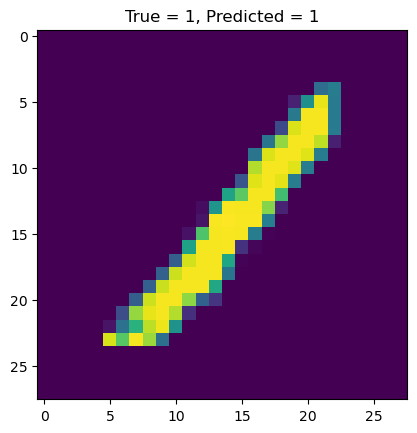

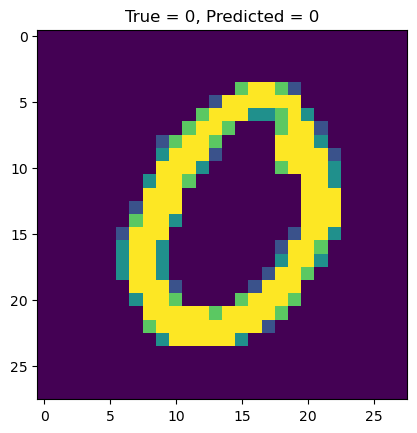

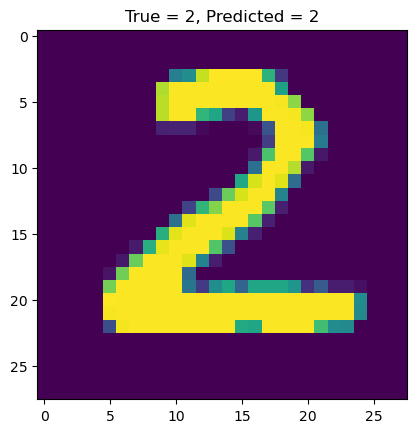

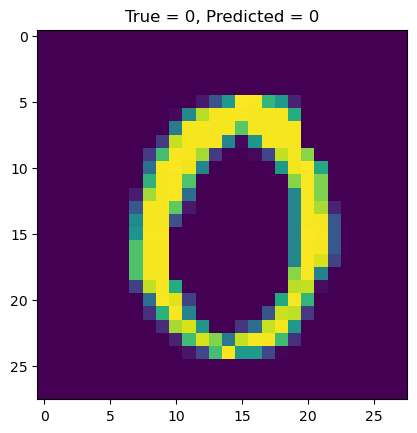

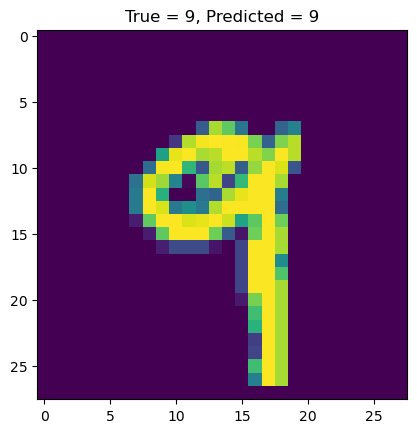

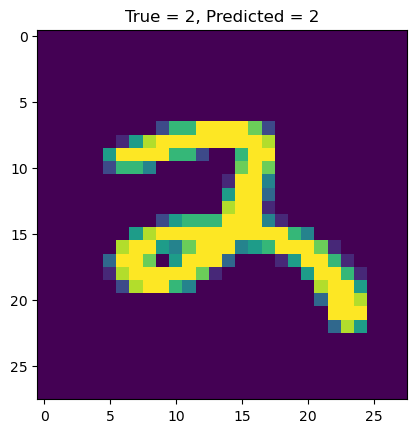

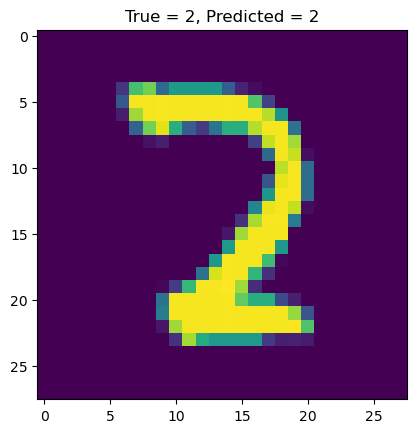

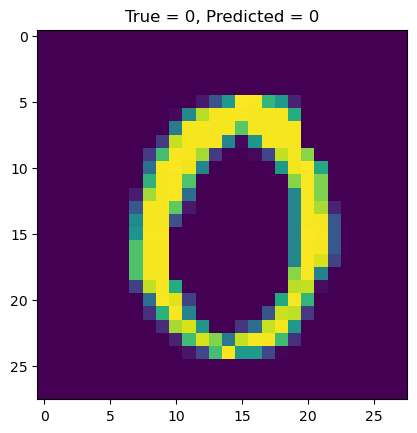

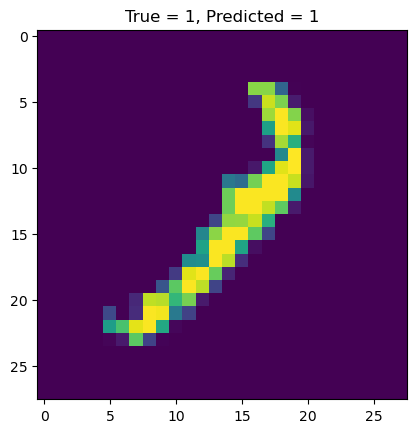

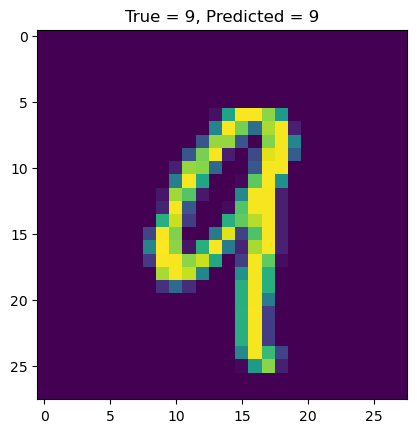

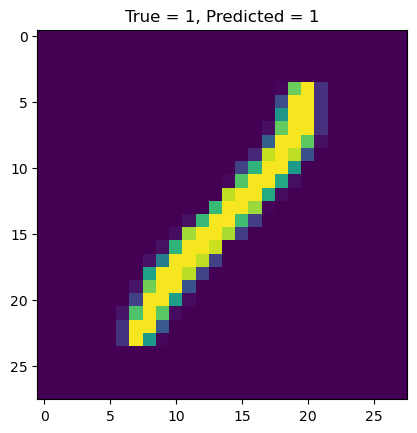

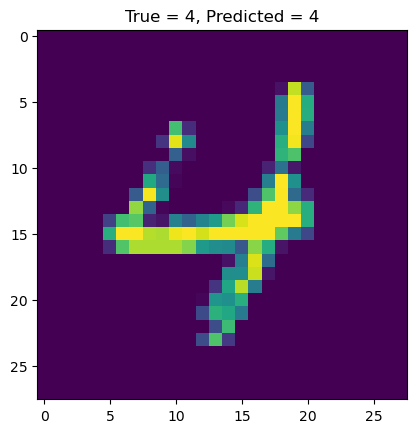

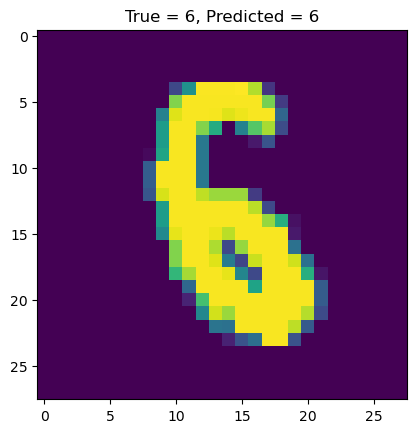

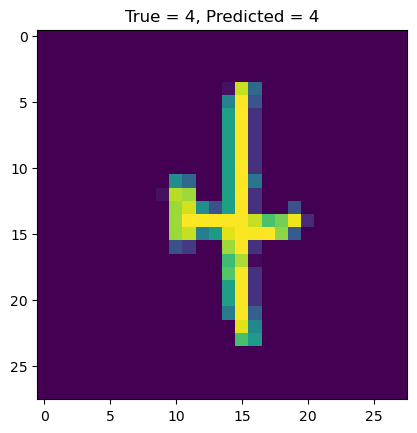

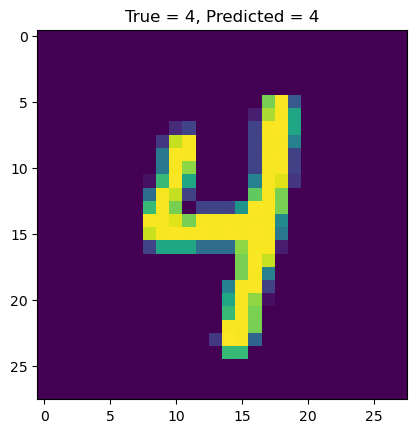

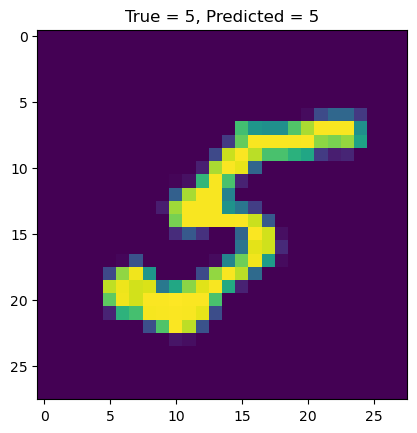

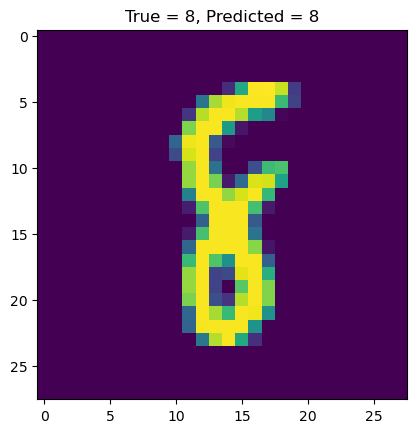

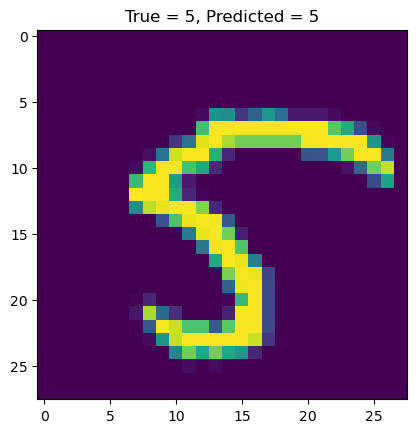

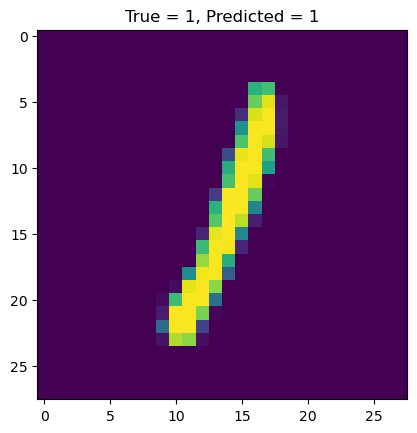

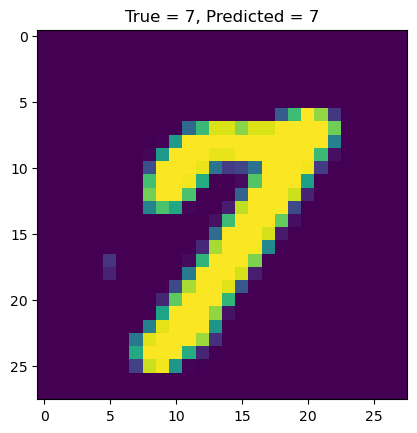

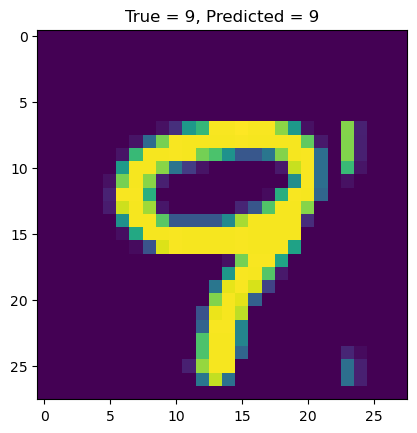

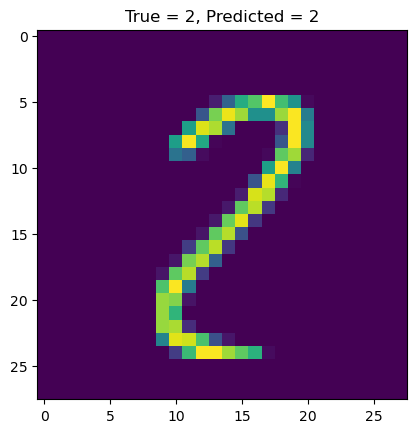

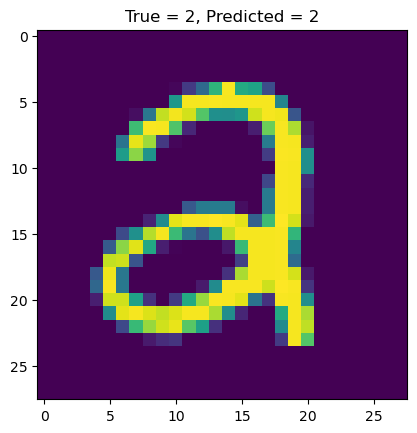

In [100]:
# testing over a few images
for i in range(30):
    idx = np.random.randint(1, len(test_data))
    data, label = test_data[idx]
    plt.imshow(data.permute(1, 2, 0))
    prediction = model(data)
    output = prediction.argmax(dim=1, keepdim=True).item()
    plt.title(f'True = {label}, Predicted = {output}')
    plt.show()